In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from math import pi
from matplotlib import pyplot as plt
from gp_oed_surrogate import create_gp

# Set random seed:
np.random.seed(1)

# Train GPs

## My Code

In [2]:
# Function to predict:
def f(x):
    return x * jnp.sin(x)
                       
# Gradient of function:
grad_f = jax.vmap(jax.jacfwd(f), in_axes=0)

In [3]:
# Kernel used by GP:
def kernel(x_1, x_2, params):
    val = params["const"]*jnp.exp(-0.5*((x_2 - x_1)/params["length"])**2)
    return val

In [4]:
# Helper function to plot training data and GP predictions:
def plot_gp(x_pred, y_pred, true_fun, x_true=None, y_true=None):
    fig = plt.figure()
    mean, var = y_pred['mean'].squeeze(), y_pred['var'].squeeze()
    mean_minus_std = (mean - 3 * jnp.sqrt(var)).squeeze()
    mean_plus_std = (mean + 3 * jnp.sqrt(var)).squeeze()
    plt.plot(x_pred, true_fun(x_pred).squeeze(), 'r:', label=r'$f(x) = x\,\sin(x)$')
    if (x_true is not None) and (y_true is not None):
        plt.plot(x_true, y_true, 'r.', markersize=10, label='Observations')
    plt.plot(x_pred, mean, 'b-', label='Prediction')
    plt.fill_between(x_pred.squeeze(), mean_plus_std, mean_minus_std, alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    fig.patch.set_facecolor('white')
    plt.show()

The noiseless case:

43427.8
19.88155
19.881533
19.881474
19.881233
19.880266
19.876404
19.860897
19.797651
19.022947
42.812798
16.621498
15.549626
15.525151
15.258962
15.105948
5923.4697
14.717256
14.597819
14.586017
5684.29
14.549079
14.531229
14.53128
14.523387
14.523303
14.523269
14.523274
14.523261
14.523266
14.523261
14.523261
14.52329
14.523261
14.523261
14.523259
14.523271
14.523291
14.523259
14.523259
14.523266
14.523259
14.523259
14.52329
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
      fun: array(14.52325916)
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.63763762e-05, -2.37464905e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 56
      nit: 10
     njev: 56
   status: 0
  success: True
        x: array([22.18749931,  1.67579892])
139274.81
19.88155
15.74871
109.12827
109.139015
109.19044
109.25013
109.12827
109.12827
109.12827
109.12827
109.12827
109.12827
109

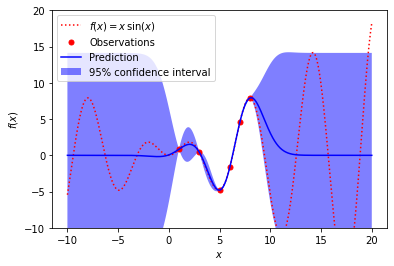

In [5]:
# Create noiseless dataset:
x_train = jnp.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y_train = (f(x_train).ravel())
y_train = y_train.reshape(len(y_train),1)

# Train Gaussian Process model:
constraints = {"const": {">": 10**-2, "<": 10**2}, 
               "length": {">": 10**-1, "<": 10**1}}
surrogate = create_gp(kernel, x_train, y_train, constraints)

# Plot predictions of GP model:
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_pred = surrogate.predict(x_pred)
plot_gp(x_pred, y_pred, f, x_train, y_train)

## GPTools

In [ ]:
!pip install gptools

In [22]:
def plot_gptools(x_pred, mean, var, true_fun, x_true=None, y_true=None):
    fig = plt.figure()
    mean_minus_std = (mean - 3 * jnp.sqrt(var)).squeeze()
    mean_plus_std = (mean + 3 * jnp.sqrt(var)).squeeze()
    plt.plot(x_pred, true_fun(x_pred).squeeze(), 'r:', label=r'$f(x) = x\,\sin(x)$')
    if (x_true is not None) and (y_true is not None):
        plt.plot(x_true, y_true, 'r.', markersize=10, label='Observations')
    plt.plot(x_pred, mean, 'b-', label='Prediction')
    plt.fill_between(x_pred.squeeze(), mean_plus_std, mean_minus_std, alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    fig.patch.set_facecolor('white')
    plt.show()

In [23]:
import gptools

gp = gptools.GaussianProcess(gptools.SquaredExponentialKernel(param_bounds=[(0, 30), (0, 5)]))
gp.add_data(x_train, y_train.squeeze(), n=0)
gp.optimize_hyperparameters(verbose=True)

/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: invalid value encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: invalid value encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: invalid value encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib

Got 12 completed starts, optimal result is:
     fun: 56.37526871323868
     jac: array([-0.00075722,  0.00250244])
 message: 'Optimization terminated successfully'
    nfev: 75
     nit: 21
    njev: 21
  status: 0
 success: True
       x: array([4.71093591, 1.67588006])

LL	-56.4
sigma_f	4.71
l_1	1.68


(     fun: 56.37526871323868
      jac: array([-0.00075722,  0.00250244])
  message: 'Optimization terminated successfully'
     nfev: 75
      nit: 21
     njev: 21
   status: 0
  success: True
        x: array([4.71093591, 1.67588006]),
 12)

# First Derivative Pred

## My Code

In [6]:
def vectorise(f):
    return jax.vmap(jax.vmap(f,in_axes=(None,0,None)),in_axes=(0,None,None))

kernel_vmap = vectorise(kernel)
kernel_1 = jax.jacfwd(kernel, argnums=1)
kernel_01 = jax.jacfwd(kernel_1, argnums=0)
kernel_01_diag  = jax.vmap(kernel_01, in_axes=(0,0,None))
kernel_1_vect = vectorise(kernel_1)

In [17]:
from jax.scipy.linalg import cho_solve

def compute_var(x_new, x_train, kernel, kernel_1, kernel_01, params, L):
    k = kernel(x_train, x_new, params)
    k_1 = kernel_1(x_train, x_new, params).squeeze()
    print(k_1)
    k_01 = kernel_01(x_new, x_new, params).squeeze()
    v = cho_solve((L, True), k_1)
    return k_01 - jnp.einsum("ki,ki->i", k_1, v)
    
var = compute_var(x_pred, x_train, kernel_vmap, kernel_1_vect, kernel_01_diag, surrogate.params, surrogate.L)  

[[ 3.8276720e-08  4.2930225e-08  4.8133408e-08 ... -2.7385032e-26
  -2.2396273e-26 -1.8310337e-26]
 [ 8.7895542e-12  1.0075476e-11  1.1545681e-11 ... -8.6646095e-21
  -7.2406924e-21 -6.0488669e-21]
 [ 4.7425226e-16  5.5555726e-16  6.5058997e-16 ... -6.5058261e-16
  -5.5555726e-16 -4.7425226e-16]
 [ 2.0277557e-18  2.4012271e-18  2.8425636e-18 ... -1.0382524e-13
  -8.9626325e-14 -7.7343188e-14]
 [ 6.0488669e-21  7.2406924e-21  8.6646095e-21 ... -1.1545639e-11
  -1.0075401e-11 -8.7895542e-12]
 [ 1.2594391e-23  1.5239641e-23  1.8434447e-23 ... -8.9388835e-10
  -7.8860091e-10 -6.9548356e-10]]
8.030437


(6, 1000)
(6, 6)


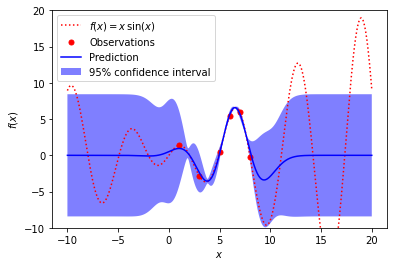

In [58]:
grad_order = 1

# Plot predictions of GP model:
x_pred =  jnp.atleast_2d(jnp.linspace(0, 10, 1000)).T
y_pred = surrogate.predict(x_pred)

grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)

x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
grad = ({'idx': [0], 'order':grad_order}, )
y_pred = surrogate.predict(x_pred, grad=grad)
y_true = grad_f(x_train).squeeze()
var = compute_var(x_pred, x_train, kernel_vmap, kernel_1_vect, kernel_01_diag, surrogate.params, surrogate.L) 
y_pred['var'] = var
plot_gp(x_pred, y_pred, grad_f, x_train, y_true)

## GPTools

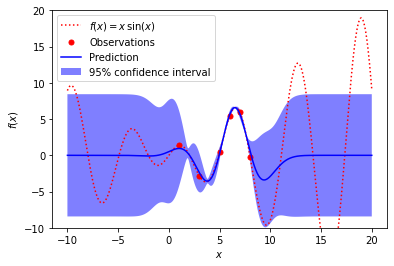

In [60]:
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_star, err_y_star = gp.predict(x_pred, n=1)
plot_gptools(x_pred, y_star, err_y_star**2, grad_f, x_train, y_true)

# Second Derivative

## My Code

In [18]:
def vectorise(f):
    return jax.vmap(jax.vmap(f,in_axes=(None,0,None)),in_axes=(0,None,None))

kernel_vmap = vectorise(kernel)
kernel_1 = jax.jacfwd(jax.jacfwd(kernel, argnums=1), argnums=1)
kernel_01 = jax.jacfwd(jax.jacfwd(kernel_1, argnums=0), argnums=0)
kernel_01_diag  = jax.vmap(kernel_01, in_axes=(0,0,None))
kernel_1_vect = vectorise(kernel_1)

[[1.4644860e-07 1.6378337e-07 1.8310733e-07 ... 1.8324611e-25
  1.5010533e-25 1.2291771e-25]
 [4.0011886e-11 4.5756132e-11 5.2307308e-11 ... 5.1754255e-20
  4.3327284e-20 3.6260877e-20]
 [2.5015094e-15 2.9243491e-15 3.4175393e-15 ... 3.4175010e-15
  2.9243491e-15 2.5015094e-15]
 [1.1426186e-17 1.3504698e-17 1.5956079e-17 ... 5.0792308e-13
  4.3943281e-13 3.8004818e-13]
 [3.6260877e-20 4.3327284e-20 5.1754255e-20 ... 5.2307120e-11
  4.5755795e-11 4.0011886e-11]
 [8.0024909e-23 9.6668473e-23 1.1673502e-22 ... 3.7256425e-09
  3.2954128e-09 2.9138751e-09]]
3.5257566


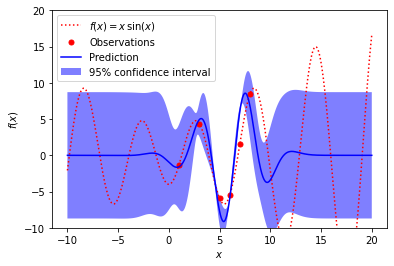

In [20]:
grad_order = 4

# Plot predictions of GP model:
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_pred = surrogate.predict(x_pred)

grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)

grad = ({'idx': [0], 'order':grad_order}, )
y_pred = surrogate.predict(x_pred, grad=grad)
y_true = grad_f(x_train).squeeze()
var = compute_var(x_pred, x_train, kernel_vmap, kernel_1_vect, kernel_01_diag, surrogate.params, surrogate.L) 
y_pred['var'] = var
plot_gp(x_pred, y_pred, grad_f, x_train, y_true)

## GPTools

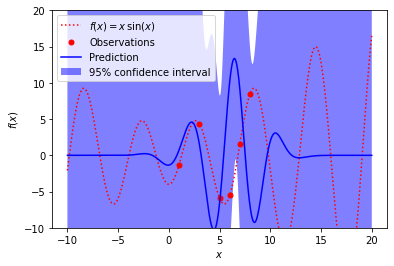

In [26]:
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_star, err_y_star = gp.predict(x_pred, n=5)
plot_gptools(x_pred, y_star, err_y_star**2, grad_f, x_train, y_true)